In [1]:
from overcooked_ai_py.mdp.overcooked_env import OvercookedEnv, Overcooked
from overcooked_ai_py.mdp.overcooked_mdp import OvercookedGridworld
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.mdp.actions import Action
from overcooked_ai_py.agents.agent import Agent, RandomAgent
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_mdp = OvercookedGridworld.from_layout_name("cramped_room") #or other layout
base_env = OvercookedEnv.from_mdp(base_mdp, info_level=0, horizon=400)
env = Overcooked(base_env=base_env, featurize_fn=base_env.featurize_state_mdp)

In [3]:
random_agent_1 = RandomAgent(all_actions=True)
random_agent_2 = RandomAgent(all_actions=True)

The action returned by agent.action(state) is a tuple containing the action and a dictionary with additional info. in the case of the random agent, it contains the probability of selecting each action.

In [4]:
obs = env.reset()
action1 = random_agent_1.action(obs)
action2 = random_agent_2.action(obs)
print(f"action: {action1}")
print(f"action: {action2}")

action: ((0, -1), {'action_probs': array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])})
action: ('interact', {'action_probs': array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])})


The action class has several dictionaries in order to map the action returned by the agent into various formats.

In [5]:
print(f"ACTION_TO_INDEX : {Action.ACTION_TO_INDEX}")
print(f"ACTION_TO_CHAR : {Action.ACTION_TO_CHAR}")

ACTION_TO_INDEX : {(0, -1): 0, (0, 1): 1, (1, 0): 2, (-1, 0): 3, (0, 0): 4, 'interact': 5}
ACTION_TO_CHAR : {(0, -1): '↑', (0, 1): '↓', (1, 0): '→', (-1, 0): '←', (0, 0): 'stay', 'interact': 'interact'}


The state returned by the env.step() or env.reset() is a dictionary containing various info:
- both_agent_obs is the observation of each agent. What does it represent?
- overcooked_state is an object of the OvercookedState class (overcooked_mdp.py) and it contains various info about the state, like overcooked_state.players_position and overcooked_state.players_orientation
- other_agent_env_idx: what does it represent?

In [6]:
obs = env.reset()
both_agent_obs, overcooked_state, other_agent_env_idx = (v for v in obs.values())
obs

{'both_agent_obs': (array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,
          1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  1., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1.,  0.,  0.,  0., -2.,  2.,  0.,  0.,  0.,  0.,  0.,
          2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
          0.,  2., -1.,  1.,  2.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -2.,
          2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., -1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
          1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,

check the attributes of the overcooked_state

In [7]:
overcooked_state.players_pos_and_or

(((1, 2), (0, -1)), ((3, 1), (0, -1)))

env.render() generates an rgb images of the game

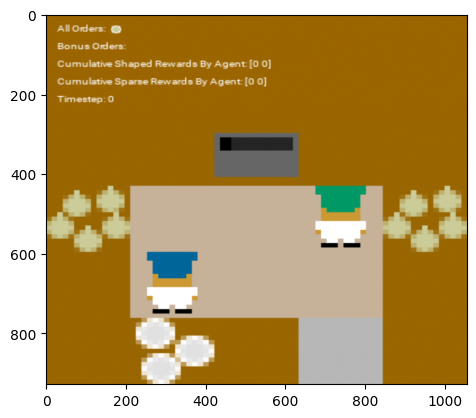

In [8]:
render = env.render() / 255.0
plt.imshow(render)

In [9]:
obs['overcooked_state'].player_positions

((1, 2), (3, 1))

In [10]:
player_1_action = Action.ACTION_TO_INDEX[action1[0]]
print(f"Action chosen by the player1: {Action.ACTION_TO_CHAR[action1[0]]}")
player_2_action = Action.ACTION_TO_INDEX[action2[0]]
print(f"Action chosen by the player2: {Action.ACTION_TO_CHAR[action2[0]]}")

Action chosen by the player1: ↑
Action chosen by the player2: interact


The action required by the environment must be a Tuple containing the 2 action performed by the agents in **index format**
env.step() returns the observation, reward, done, env_info 

In [11]:
action = (player_1_action, player_2_action)
new_obs, reward, done, env_info = env.step(action)

In [12]:
new_obs['overcooked_state'].players_pos_and_or

(((1, 1), (0, -1)), ((3, 1), (0, -1)))

Player1 is the one on the left, Player2 is the one on the right. But how do i understand the POV of the observation state? Sometimes the 'other_agent_env_idx' is 1, and sometimes is 0.

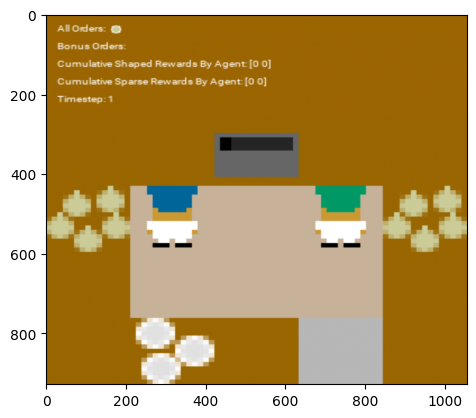

In [13]:
render = env.render() / 255.0
plt.imshow(render)

You probably need to implement your agent class.

In [ ]:
class MyAgent(Agent):
    def __init__(self):
        super().__init__()

    def action(self, state):
        """
        We want to output the action given the state. can use a NN!
        """
        pass

    def actions(self, states):
        pass

    def update(self, state, reward):
        """
        What do we need to update?
        """
        pass

0

In [18]:
render = env.render()
StateVisualizer().display_rendered_state(render, window_display=True)

AssertionError: 